In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import urllib

In [2]:
class_names = ["cat", "dog"]

In [3]:
def resize2SquareKeepingAspectRation(img, size, interpolation):
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    if h == w: 
        return cv2.resize(img, (size, size), interpolation)
    if h > w: 
        dif = h
    else:
        dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)


def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read it into OpenCV format
    req = urllib.request.Request(url, headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    })
    req = urllib.request.urlopen(req)
    image = np.asarray(bytearray(req.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
K.clear_session()
with tf.device('/cpu:0'):
#     model = load_model("cat_dogs_with_InceptionResNetV2.hdf5")
    model = load_model("cat_dogs_with_InceptionResNetV2_WITHOUT_OPTIMIZER.hdf5")

In [5]:
# CATS:
CATS_LINKS = ["https://www.aspca.org/sites/default/files/cat-care_cat-grooming_eye-care_body5-right.jpg",
              "https://dbw4iivs1kce3.cloudfront.net/680x390/2018/04/Can-I-bathe-my-cat-2018.jpg",
              "https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/features/when_your_dog_or_cat_has_an_allergy_features/650x350_when_your_dog_or_cat_has_an_allergy_features.jpg",
              "https://cdn1-www.cattime.com/assets/uploads/gallery/ragdoll/ragdoll-cats-kittens-1.jpg"
             ]

# DOGS:
DOGS_LINKS = ["https://www.washingtonpost.com/resizer/uwlkeOwC_3JqSUXeH8ZP81cHx3I=/arc-anglerfish-washpost-prod-washpost/public/HB4AT3D3IMI6TMPTWIZ74WAR54.jpg",
              "https://upload.wikimedia.org/wikipedia/commons/0/06/02._Coahoma_Arkansas_Logan.jpg",
              "https://static.wixstatic.com/media/a2fc0ca8932f43bdb3451810fe75a5f6.jpg/v1/fill/w_980,h_423,al_l,q_85,usm_0.66_1.00_0.01/a2fc0ca8932f43bdb3451810fe75a5f6.webp",
              "https://3c918j3kwt6a3vrcmw3irl7u-wpengine.netdna-ssl.com/wp-content/uploads/2019/10/IMG_3827.jpg"
             ]

# CAT WITH DOG TOGETHER:
CATS_WITH_DOGS_LINKS = ["https://storage.googleapis.com/petbacker/images/blog/2018/cat-dog-indoors.jpg",
                       "https://i.ytimg.com/vi/xmNNRzFuvvs/maxresdefault.jpg",
                       "https://images2.minutemediacdn.com/image/upload/c_crop,h_706,w_1256,x_0,y_64/f_auto,q_auto,w_1100/v1554995050/shape/mentalfloss/516438-istock-637689912.jpg"
                       ]

In [6]:
def predict_from_imagelink(image_link):
    print("="*125)

    # Get image from link and resize to model's input size (299, 299, 3)
    orig_image = url_to_image(image_link)
    resized_image = resize2SquareKeepingAspectRation(orig_image, 299, cv2.INTER_AREA)
    orig_image = orig_image / 255.
    resized_image = resized_image / 255.

    # Image plot
    plt.figure(figsize=(20,20))

    plt.subplot(2,2,1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(orig_image, cmap=plt.cm.binary)
    plt.xlabel("Original image")

    plt.subplot(2,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(resized_image, cmap=plt.cm.binary)
    plt.xlabel("Resized image")

    plt.show()

    resized_image = resized_image.reshape(1,299,299,3)

    y_pred = model.predict(resized_image)[0]
    print("Prediction result:")
    for idx, prob in enumerate(y_pred):
        print(class_names[idx].upper() + ":", str(prob * 100.0) + "%")

    print("="*125)

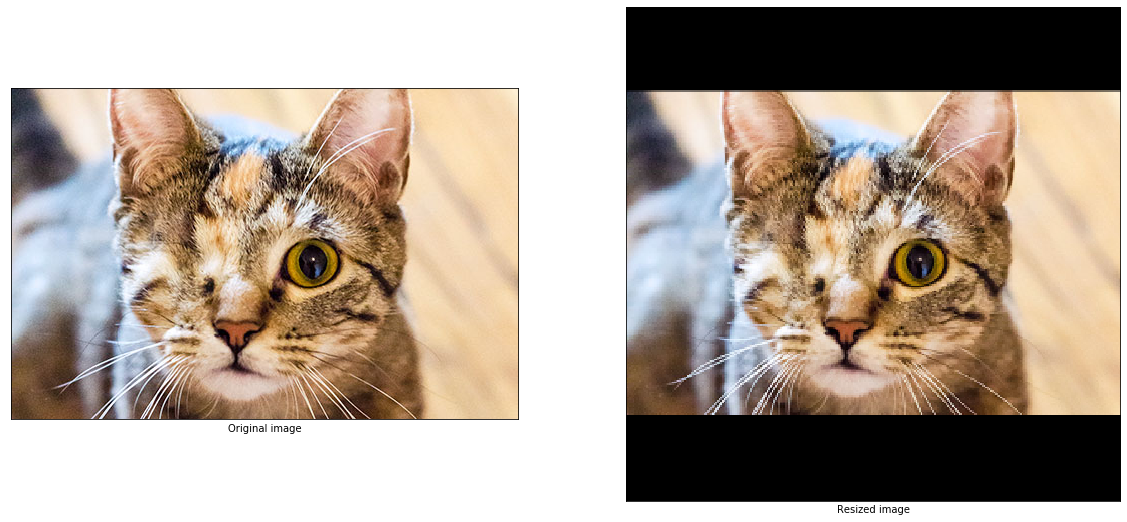

Prediction result:
CAT: 100.0%
DOG: 0.0%


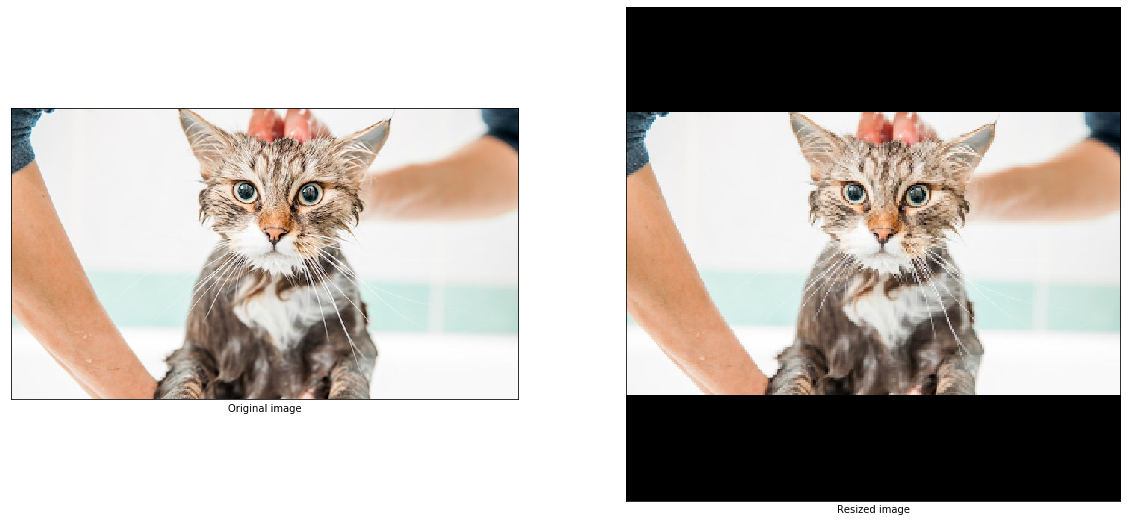

Prediction result:
CAT: 100.0%
DOG: 0.0%


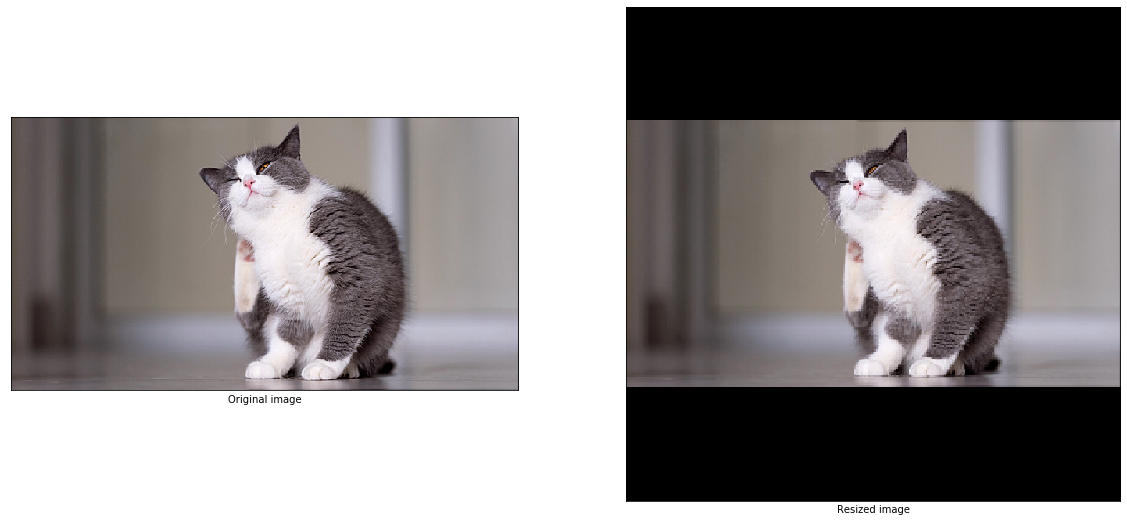

Prediction result:
CAT: 100.0%
DOG: 0.0%


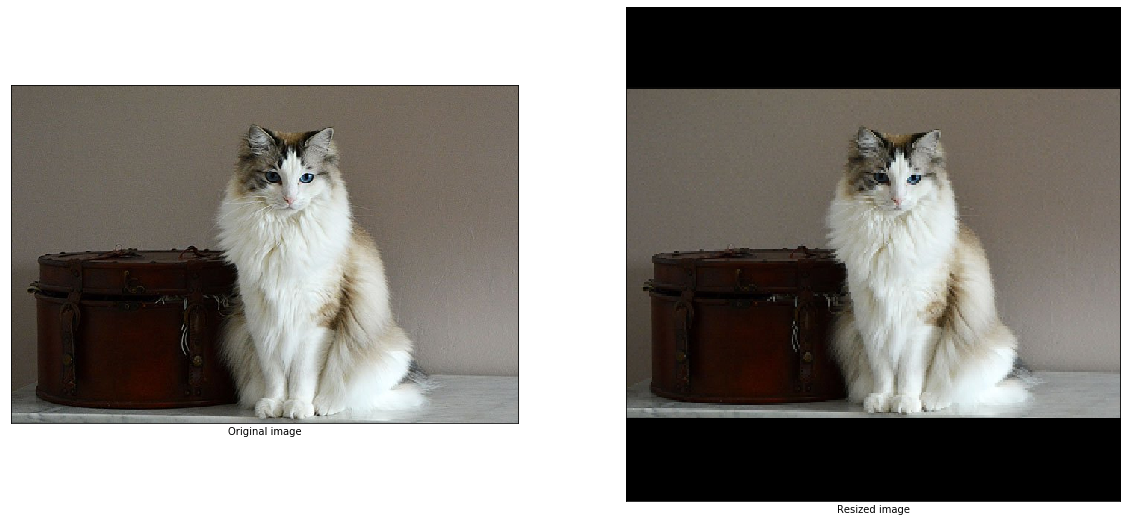

Prediction result:
CAT: 100.0%
DOG: 0.0%


In [7]:
for link in CATS_LINKS:
    predict_from_imagelink(link)

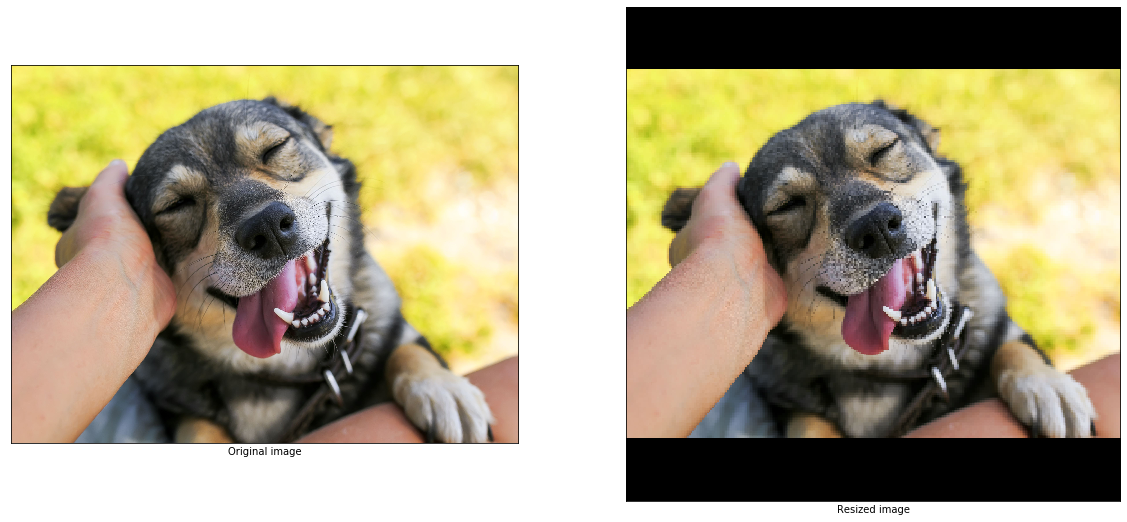

Prediction result:
CAT: 4.4645399878385453e-13%
DOG: 100.0%


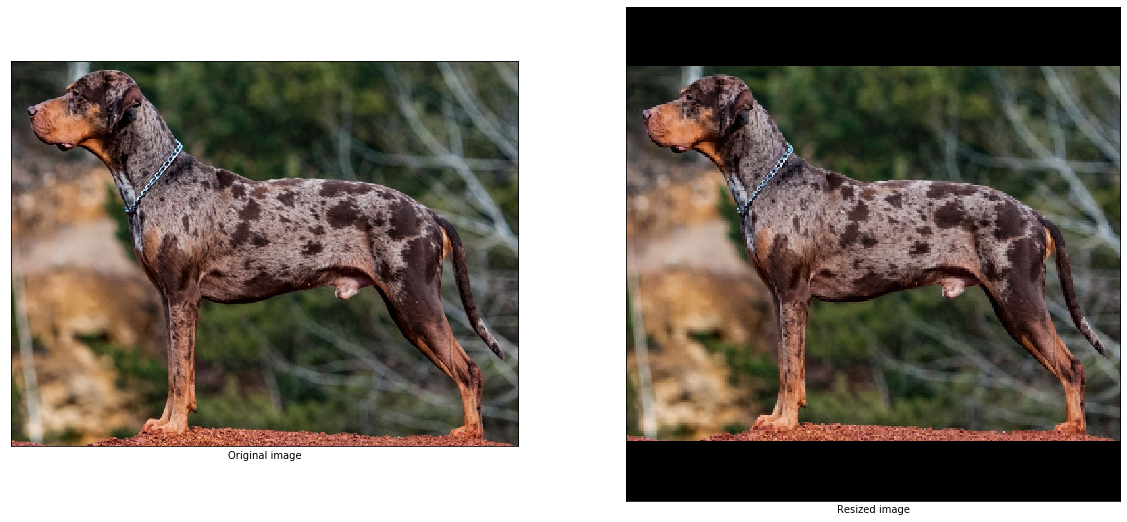

Prediction result:
CAT: 2.236675549446954e-32%
DOG: 100.0%


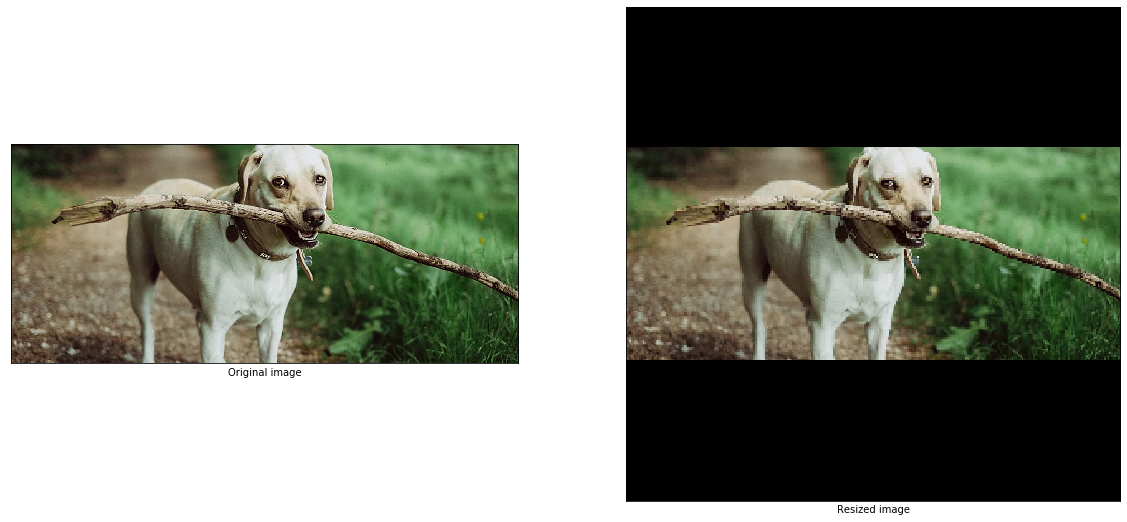

Prediction result:
CAT: 5.687236820148373e-27%
DOG: 100.0%


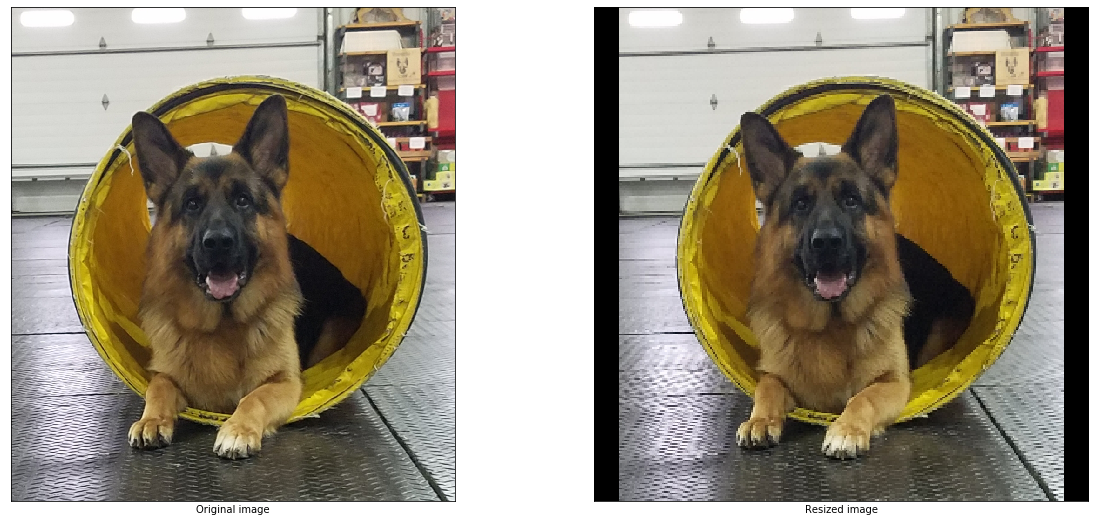

Prediction result:
CAT: 0.12655386235564947%
DOG: 99.87344145774841%


In [8]:
for link in DOGS_LINKS:
    predict_from_imagelink(link)

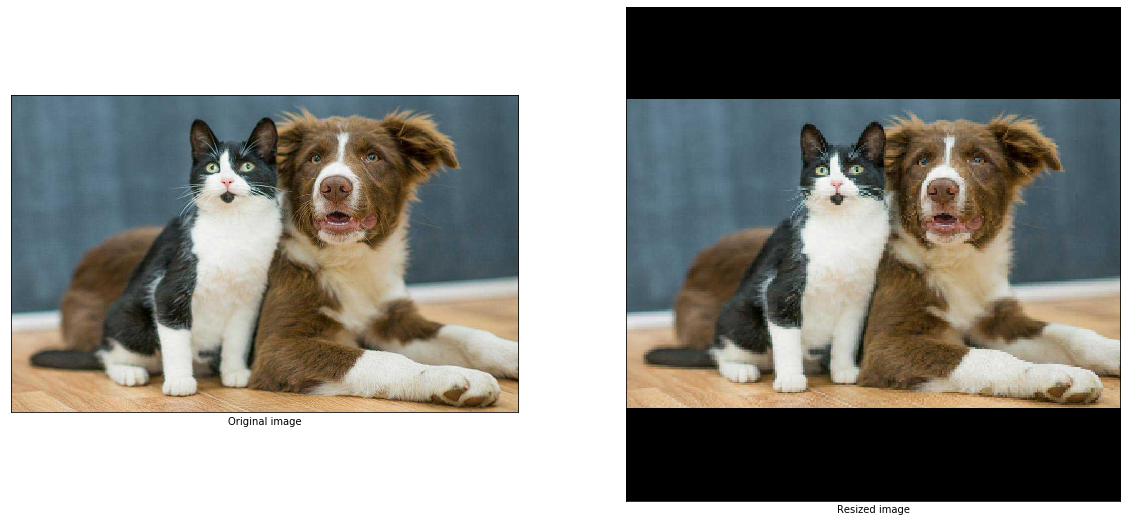

Prediction result:
CAT: 100.0%
DOG: 4.699160882637443e-06%


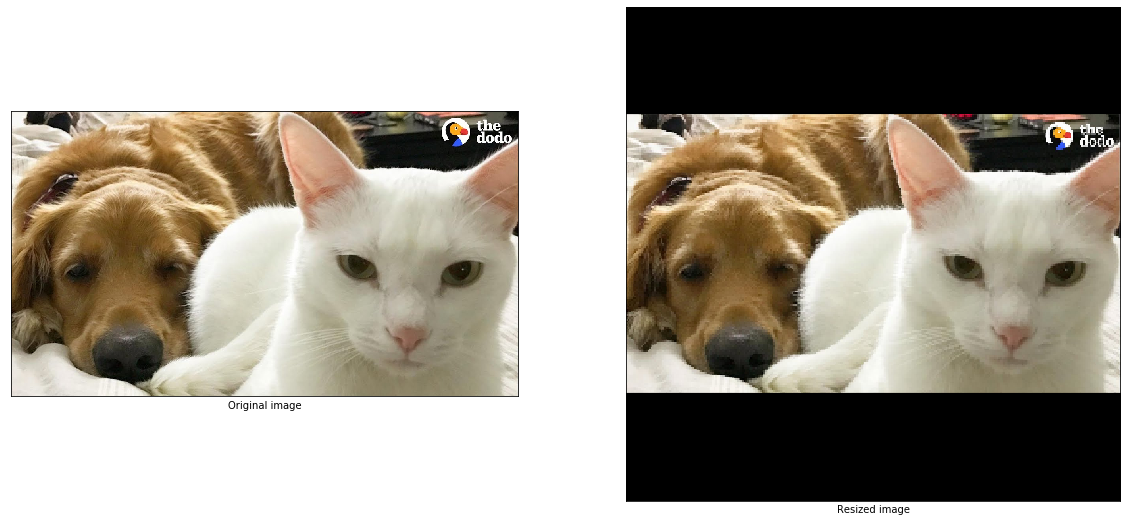

Prediction result:
CAT: 73.04390072822571%
DOG: 26.956096291542053%


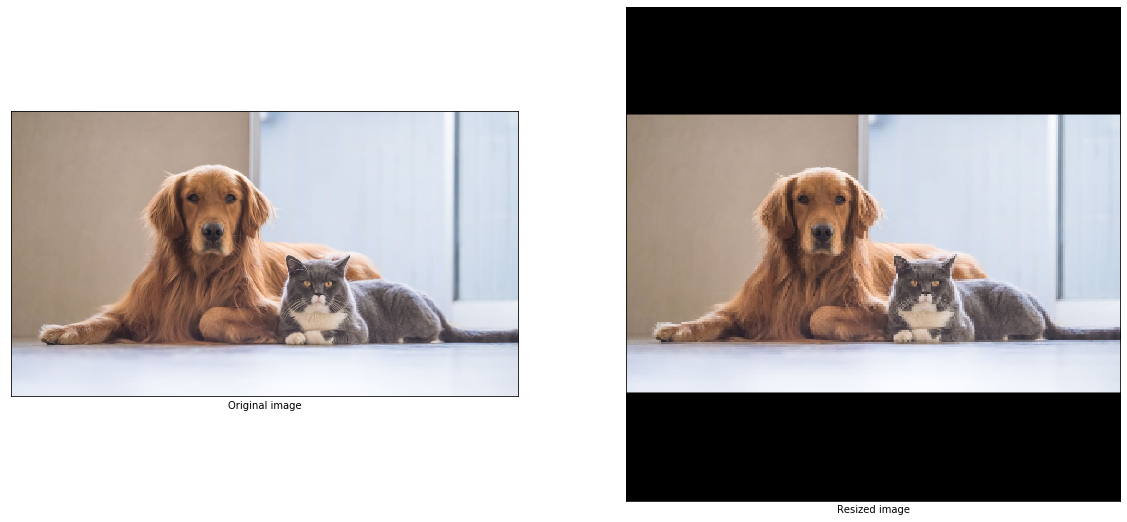

Prediction result:
CAT: 9.571091141857835e-09%
DOG: 100.0%


In [9]:
for link in CATS_WITH_DOGS_LINKS:
    predict_from_imagelink(link)